# **project2**

## **A brief analysis for BeiJin housing price & prediction**

# **1.1 introduction**

This case studies the concentration trend of house type structure/house age/area/suburban time and its impact on the transaction price through the use of Beijing's LinkedIn second-hand house database. The decision tree algorithm of machine learning is introduced to predict the house price, and the model is evaluated and calibrated to get the best prediction of the house price in Beijing.








In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print ("Set up complete")
# Any results you write to the current directory are saved as output.

Set up complete


# **1.2 Content**

It includes URL, ID, Lng, Lat, CommunityID, TradeTime, DOM(days on market), Followers, Total price, Price, Square, Living Room, number of Drawing room, Kitchen and Bathroom, Building Type, Construction time. renovation condition, building structure, Ladder ratio( which is the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average), elevator, Property rights for five years（It's related to China restricted purchase of houses policy), Subway, District, Community average price.

Most data is traded in 2011-2017, some of them is traded in Jan,2018, and some is even earlier(2010,2009)

All the data was fetching from https://bj.lianjia.com/chengjiao.

In [ ]:
# database import
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/new.csv.zip",encoding='gbk')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [ ]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


# **2. Data cleaning**

In [ ]:
#Observe whether the data type of each column is wrong
df.dtypes

url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [ ]:
# Create a new column that contains only integers
df['integer_only'] = df['floor'].astype(str).str.extract('(\d+)', expand=False).astype(np.float64)



In [ ]:
#去除livingRoom中的异常数值，更改数据类型
df=df.loc[df.livingRoom!='#NAME?',:]
df.livingRoom=df.livingRoom.astype('int64')
df.livingRoom.value_counts()

2    77373
1    38915
3    32116
4     3226
5      506
6      102
7       19
0        9
Name: livingRoom, dtype: int64

In [ ]:
#统一drawingRoom,bathRoom的数据为整数
df.drawingRoom=df.drawingRoom.astype('int64')
df.bathRoom=df.bathRoom.astype('int64')

In [ ]:
#Observing the data types of each column, it is found that the data types of 'tradeTime', 'floor', and 'constructionTime' are wrong, which need to be processed first
##Extract the transaction year as a separate column:
df = df.dropna()
df['tradeyear']=df.tradeTime.astype(str).str[0:4]


<ipython-input-194-58af46969b04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tradeyear']=df.tradeTime.astype(str).str[0:4]


In [ ]:
#将'constructionTime'列中的未知项跳过,只考虑1950到2016年建成的房子:
df = df.dropna()
df.constructionTime=df.constructionTime.replace('未知','9999').astype('int64')
df=df.loc[(df.constructionTime>=1950)&(df.constructionTime<=2016),:]

In [ ]:
df.head()


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,integer_only,tradeyear
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,3,6,0.217,1.0,0.0,1.0,7,56021.0,26.0,2016
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,4,6,0.667,1.0,1.0,0.0,7,71539.0,22.0,2016
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,3,6,0.500,1.0,0.0,0.0,7,48160.0,4.0,2016
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1,6,0.273,1.0,0.0,0.0,6,51238.0,21.0,2016
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,2,2,0.333,0.0,1.0,1.0,1,62588.0,6.0,2016


# **3. The average price trend in Beijing over the years:**

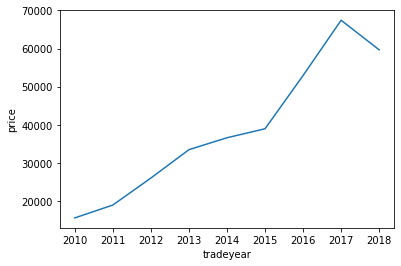

In [ ]:
df_year=df.groupby('tradeyear').price.mean()
sns.lineplot(data=df_year)

From this figure, the average price in Beijing has been rising from 2016 to 2017.

# **4. The influence of location on house transaction price**

In [ ]:
##Look at the number of transaction records in the database over the years, and find that the transaction records in 2016 are the most complete.
df.tradeyear.value_counts()

2016    64098
2017    42009
2015    27366
2013     7043
2012     5584
2014     4899
2011      871
2018      219
2010      177
Name: tradeyear, dtype: int64

In [ ]:
df_2016=df.loc[df.tradeyear=='2016',:]

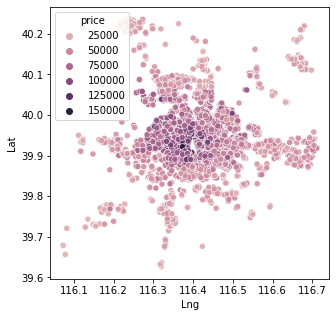

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df_2016['Lng'],y=df_2016['Lat'],hue=df_2016['price'])

Looking at the distribution of the core areas of Beijing (radiating out from Tiananmen Square), the average price in concentrated areas exceeds 75000.In the entire area, the houses of average price with 25,000 are the most.

# **5. The distribution of room type, room age, area and decoration**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


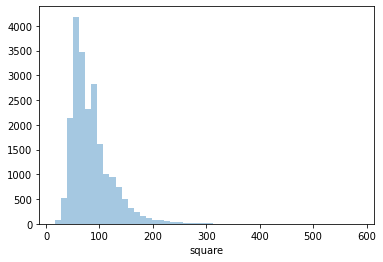

In [ ]:
sns.distplot(a=df_2016['square'],kde=False)

The picture shows that the housing area of Beijingers is 70 to 80. It can be inferred that the residents’ economy and income do not support buying a particularly large house and most people choose a small house.

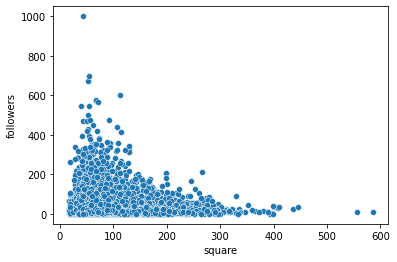

In [ ]:
sns.scatterplot(x=df_2016['square'],y=df_2016['followers'])

It can be seen that most of the second-hand houses on the market are small units of 50 to 100 square meters, accounting for more than half of the total. Moreover, the houses that receive the highest attention are also distributed in the 1-100 square meters.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


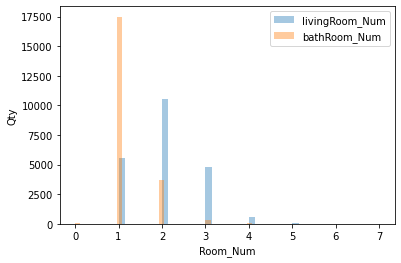

In [ ]:
sns.distplot(a=df_2016['livingRoom'],kde=False,label='livingRoom_Num')
sns.distplot(a=df_2016['bathRoom'],kde=False,label='bathRoom_Num')
plt.xlabel('Room_Num')
plt.ylabel('Qty')
plt.legend()

It can be seen that the number of two-livingroom/one-bathroom units is the largest, and the number of livingrooms is basically 1 to 3 rooms.

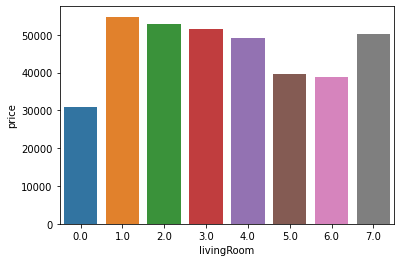

In [ ]:
livingRoom_Num=df_2016.groupby('livingRoom').price.mean()
sns.barplot(x=livingRoom_Num.index,y=livingRoom_Num)

By comparing the average transaction price of houses with different numbers of bedrooms, it is found that the average price of 1-3 bedrooms is slightly higher than that of other apartment types.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


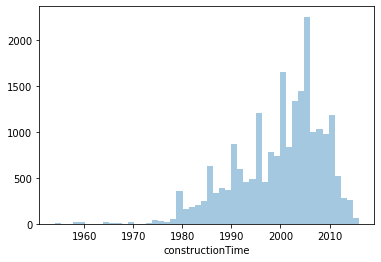

In [ ]:
sns.distplot(a=df_2016['constructionTime'],kde=False)

The construction years of the houses are mainly distributed around 1980 to the present.Most built from 2000 to 2005.

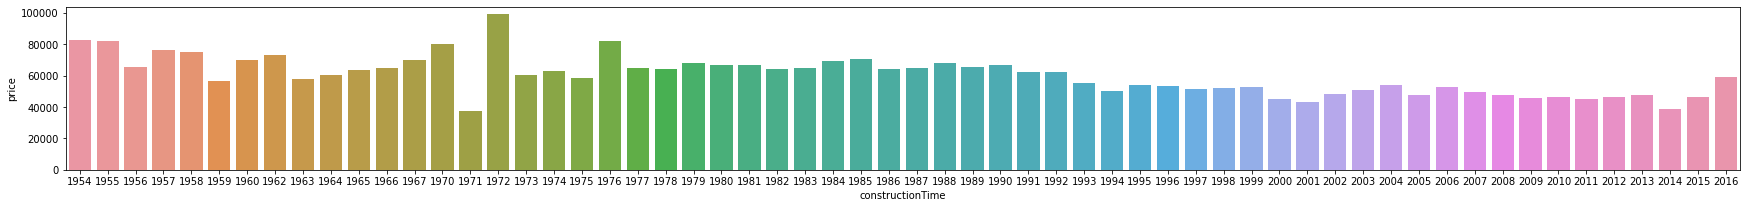

In [ ]:
plt.figure(figsize=(30,3))
ConstructionTime_price=df_2016.groupby('constructionTime').price.mean()
sns.barplot(x=ConstructionTime_price.index,y=ConstructionTime_price)

By comparing the average transaction price of different house ages year by year (the year of completion is the horizontal axis), it is found that the average house price has little relationship with the age of the house, and even a high house age is accompanied by a high price. The analysis may be due to Beijing Historic houses are especially scarce due to (pictured above).

# **5. Forecast of housing prices in Beijing:**

In [ ]:
#Divide the database into algorithm training samples and fitting detection samples:
df_2016_filtered=df_2016.dropna(axis=0)
y=df_2016_filtered.price
Predict_features=['Lng','Lat','Cid','livingRoom','bathRoom','constructionTime','buildingType','renovationCondition','subway']
X=df_2016_filtered[Predict_features]
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [ ]:
#In order to avoid the situation of over-fitting or under-fitting of the algorithm, the algorithm is defined to check the decision tree model, and the optimal algorithm parameters have been found:
def get_mae(max_leaf_nodes,train_X,train_y):
    model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    model.fit(train_X,train_y)
    pred_val=model.predict(val_X)
    mae=mean_absolute_error(pred_val,val_y)
    return(mae)

In [ ]:
for max_leaf_nodes in [500,1000,2000,3000,5000]:
    my_mae=get_mae(max_leaf_nodes,train_X,train_y)
    print("Max_leaf_nodes:%d \t Mean absolute error:%d"%(max_leaf_nodes,my_mae))

Max_leaf_nodes:500 	 Mean absolute error:5089
Max_leaf_nodes:1000 	 Mean absolute error:4875
Max_leaf_nodes:2000 	 Mean absolute error:4822
Max_leaf_nodes:3000 	 Mean absolute error:4903
Max_leaf_nodes:5000 	 Mean absolute error:4998


It can be seen from the above results that when the number of decision tree nodes is 2000, the fitting result error is the smallest: the final result fitting is as follows:

In [ ]:
final_model=DecisionTreeRegressor(max_leaf_nodes=2000,random_state=1)
final_model.fit(X,y)
final_pred=final_model.predict(X)
final_mae=mean_absolute_error(final_pred,y)
print(final_mae)

3147.2684437782063


According to this algorithm, the average error between the predicted house price and the actual house price in 2016 is 3147 yuan.

# **6.conclusion**

This case studies the concentration trend of house type structure/house age/area/suburban time and its impact on the transaction price by using the Beijing Lianjia second-hand house database.As time goes by, house prices in Beijing continue to rise. The closer to the center, the more expensive the housing price. The houses are mainly two bedrooms and one bathroom, and the living area is mainly 70 to 80. The average price of 1-3 bedrooms is slightly higher than that of other apartment types.

# **7.references**

S. Borde, A. Rane, G. Shende, and S. Shetty, “Real estate investment advising using machine learning,” International Research Journal of Engineering and Technology (IRJET), vol. 4, no. 3, p. 1821, 2017.

B. Trawinski, Z. Telec, J. Krasnoborski et al., “Comparison of expert algorithms with machine learning models for real estate appraisal,” in Proceedings of the 2017 IEEE International Conference on INnovations in Intelligent SysTems and Applications (INISTA), Gdynia, Poland, July 2017.

V. Kontrimas and A. Verikas, “The mass appraisal of the real estate by computational intelligence,” Applied Soft Computing, vol. 11, no. 1, pp. 443–448, 2011.

M. Woźniak, M. Graña, and E. Corchado, “A survey of multiple classifier systems as hybrid systems,” Information Fusion, vol. 16, pp. 3–17, 2014.

J. R. Barr, E. A. Ellis, A. Kassab, C. L. Redfearn, N. N. Srinivasan, and K. B. Voris, “Home price index: a machine learning methodology,” International Journal of Semantic Computing, vol. 11, no. 1, pp. 111–133, 2017.

W. J. McCluskey, M. McCord, P. T. Davis, M. Haran, and D. McIlhatton, “Prediction accuracy in mass appraisal: a comparison of modern approaches,” Journal of Property Research, vol. 30, no. 4, pp. 239–265, 2013.

S. Rosen, “Hedonic prices and implicit markets: product differentiation in pure competition,” Journal of Political Economy, vol. 82, no. 1, pp. 34–55, 1974.

E. Lughofer, B. Trawiński, K. Trawiński, O. Kempa, and T. Lasota, “On employing fuzzy modeling algorithms for the valuation of residential premises,” Information Sciences, vol. 181, no. 23, pp. 5123–5142, 2011.

H. Kusan, O. Aytekin, and I. Özdemir, “The use of fuzzy logic in predicting house selling price,” Expert Systems with Applications, vol. 37, no. 3, pp. 1808–1813, 2010.

O. Bin, “A prediction comparison of housing sales prices by parametric versus semi-parametric regressions,” Journal of Housing Economics, vol. 13, no. 1, pp. 68–84, 2004.

Y. Kang, F. Zhang, W. Peng et al., “Understanding house price appreciation using multi-source big geo-data and machine learning,” Land Use Policy, vol. 2020, Article ID 104919, 2020.

A. Din, M. Hoesli, and A. Bender, “Environmental variables and real estate prices,” Urban Studies, vol. 38, no. 11, pp. 1989–2000, 2001.

J.-G. Liu, X.-L. Zhang, and W.-P. Wu, “Application of fuzzy neural network for real estate prediction,” Advances in Neural Networks - ISNN 2006, vol. 3973, pp. 1187–1191, 2006.

I. V. Lokshina, M. D. Hammerslag, and R. C. Insinga, “Applications of artifificial intelligence methods for real estate valuation and decision support,” in Proceedings of the In Hawaii international conference on business, Honolulu, Hawaii, USA, January 2003.

J. Hauke and T. Kossowski, “Comparison of values of Pearson’s and Spearman’s correlation coefficients on the same sets of data,” QUAGEO, vol. 30, no. 2, pp. 87–93, 2011.

T. Oladunni and S. Sharma, “Hedonic housing theory - a machine learning investigation,” in Proceedings of the 2016 15th IEEE International Conference on Machine Learning and Applications (ICMLA), Anaheim, CA, USA, December 2016.

L. Petrella and V. Raponi, “Joint estimation of conditional quantiles in multivariate linear regression models with an application to financial distress,” Journal of Multivariate Analysis, vol. 173, pp. 70–84, 2019.

G. Soffritti and G. Galimberti, “Multivariate linear regression with non-normal errors: a solution based on mixture models,” Statistics and Computing, vol. 21, no. 4, pp. 523–536, 2010.



In [ ]:
# Create an empty dictionary to store student names and scores
students = {}

# Keep getting student names and scores until "done" is entered
while True:
    name = input("Enter student name (or 'done' to finish): ")
    if name == "done":
        break
    # Get the current scores for the student, or an empty dictionary if they don't have any scores yet
    students[name] = students.get(name, {})
    subject = input("Enter subject name: ")
    score = float(input("Enter exam score: "))
    # Add the score for the subject for the student
    students[name][subject] = score

# Get a list of all subjects for which scores have been entered
subjects = set(subject for student in students.values() for subject in student)

# Calculate the average scores for each subject
averages = {}
for subject in subjects:
    scores = [student[subject] for student in students.values() if subject in student]
    averages[subject] = sum(scores) / len(scores)

# Find the highest scores for each subject
highest = {}
highest_students = {}
for subject in subjects:
    scores = [student[subject] for student in students.values() if subject in student]
    highest[subject] = max(scores)
    # Get the list of students who got the highest score for the subject
    highest_students[subject] = [name for name, student_scores in students.items() if subject in student_scores and student_scores[subject] == highest[subject]]

# Find the lowest scores for each subject
lowest = {}
lowest_students = {}
for subject in subjects:
    scores = [student[subject] for student in students.values() if subject in student]
    lowest[subject] = min(scores)
    # Get the list of students who got the lowest score for the subject
    lowest_students[subject] = [name for name, student_scores in students.items() if subject in student_scores and student_scores[subject] == lowest[subject]]

# Print the average scores for each subject
print("Average scores:")
for subject, average in averages.items():
    print("{}: {}".format(subject, average))

# Print the highest scores for each subject and the students who got them
print("\nHighest scores:")
for subject, score in highest.items():
    print("{}: {} by {}".format(subject, score, ', '.join(highest_students[subject])))

# Print the lowest scores for each subject and the students who got them
print("\nLowest scores:")
for subject, score in lowest.items():
    print("{}: {} by {}".format(subject, score, ', '.join(lowest_students[subject])))

# Print the scores for each student for each subject
print("\nScore Summary:")
for student, scores in students.items():
    print("{}:".format(student))
    for subject, score in scores.items():
        print("    {}: {}".format(subject, score))

In [ ]:
import pandas as pd
import numpy as np

# Create a list to store the names of the subjects
subjects = []

# Get the names of the subjects
while True:
    subject = input("Enter the name of the subject (or 'q' to quit): ")
    if subject == 'q':
        break
    subjects.append(subject)

# Create a dictionary to store the scores for each student
student_scores = {}

# Get the names of the students and their scores for each subject
for subject in subjects:
    print("\nEnter scores for", subject)
    while True:
        student = input("Enter the name of the student (or 'q' to quit): ")
        if student == 'q':
            break
        score = float(input("Enter the score for {}: ".format(student)))
        if student not in student_scores:
            student_scores[student] = {}
        student_scores[student][subject] = score

# Create a dataframe to store the scores for each student
df = pd.DataFrame.from_dict(student_scores, orient='index')

# Print the average scores for all students for each subject
print("\nAverage score:")
print(df.mean())

# Print the highest and lowest scores for each subject
print("\nHighest score:")
for subject in subjects:
    highest = df[subject].idxmax()
    print("Subject:", subject, "Student:", highest, "Score:", df.at[highest, subject])

print("\nLowest score:")
for subject in subjects:
    lowest = df[subject].idxmin()
    print("Subject:", subject, "Student:", lowest, "Score:", df.at[lowest, subject])

# Print the overall table of scores
print("\nTable of scores:")
print(df)


Enter the name of the subject (or 'q' to quit): math
Enter the name of the subject (or 'q' to quit): q

Enter scores for math
Enter the name of the student (or 'q' to quit): ahy
Enter the score for ahy: 98
Enter the name of the student (or 'q' to quit): weq
Enter the score for weq: 97
Enter the name of the student (or 'q' to quit): q

Average score:
math    97.5
dtype: float64

Highest score:
Subject: math Student: ahy Score: 98.0

Lowest score:
Subject: math Student: weq Score: 97.0

Table of scores:
     math
ahy  98.0
weq  97.0


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.DataFrame({"":["adam","nafisah"],
         "weightbefore":[89,70],
         "weightafter":[85,66]})
df
df["wl"]=df["weightbefore"]-df["weightafter"]
df

,,weightbefore,weightafter,wl
0,adam,89,85,4
1,nafisah,70,66,4
